In [50]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
import numpy as np

In [2]:
df_apts = pd.read_csv('apartment-data.csv')

In [3]:
# Number of rows, columns
df_apts.shape

(10445, 17)

In [4]:
# Getting a feel of the data
df_apts.head(3)

,fingerprint,title,description,posted_date,price,currency,partitioning,surface,building_year,floor,number_of_rooms,terrace,parking,cellar,source_website,source_offer,neighborhood
0,f312def4af9fbaa38f2c8b33e94ccac00d728791,Apartament 3 camere RIVIERA LUXURY,Descriere anuntVa oferim spre inchiriere un ap...,2019-04-28 12:33:47.528798,1000,EUR,semidecomandat,87.0,2015,3.0,3.0,True,False,False,storia,Agentie imobiliara,centru
1,6b2d1adf50ed92151652bd50ebc14ebd6f53e00b,"Apartament, 2 camere, 55 mp, parcare, pe Eugen...",Descriere anuntOferta ID: 1661Va prezentam un ...,2019-04-28 12:33:48.187126,400,EUR,semidecomandat,55.0,2010,3.0,2.0,False,True,False,storia,Agentie imobiliara,europa
2,eeeb937e2eb98bce23a3b72dea5e4e986352a35f,"Apartament, 1 camera, 39 mp, terasa, pe Calea ...",Descriere anuntOferta ID: 1043Va prezentam un ...,2019-04-28 12:33:49.447887,300,EUR,decomandat,39.0,2012,10.0,1.0,True,False,False,storia,Agentie imobiliara,calea turzii


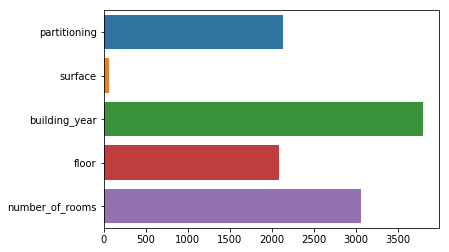

In [10]:
# Number of null values per column
df_nulls = df_apts.isnull().sum()
df_nulls = df_nulls[df_nulls > 0]
nulls_graph = sb.barplot(x=df_nulls.values, y=df_nulls.index)

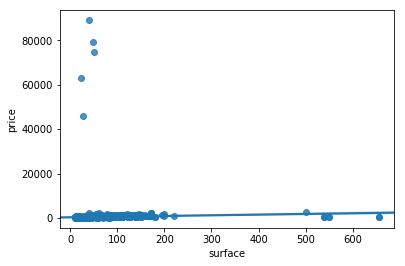

In [12]:
# Exploring the linear relationship between price and surface
linear_graph = sb.regplot(x="surface", y="price", data=df_apts)

In [47]:
# Above shows general linearity, with some outliers, namely in price
# These can be brought on by sellers wrongly marking apartments for sale as for rent
# Anything above 10,000 probably does not belong here
# Let check them out
df_apts.loc[df_apts.price > 10000]

,fingerprint,title,description,posted_date,price,currency,partitioning,surface,building_year,floor,number_of_rooms,terrace,parking,cellar,source_website,source_offer,neighborhood
717,97cf6274e599e95ed8870e4d8eee2d2ecd0d0b33,Se vinde apartament pe aleea Bizusa 48 de mp,Descriere anuntImobgaranti va propune spre van...,2019-04-28 12:49:55.050394,79000,EUR,decomandat,48.0,1990,8.0,2.0,True,True,False,storia,Agentie imobiliara,centru
913,a3d03f5cc2221c9200640dfd5df55f2e4c146a11,"Apartament in casa, 1 camera, de închiriat, în...",Descriere anuntILUSTRA IMOBILIARE inchiriază ...,2019-04-28 12:54:19.884013,89000,EUR,NaN,40.0,NaN,NaN,1.0,False,True,True,storia,Agentie imobiliara,centru
2927,318770b72464cf3a69ed1a034feaedaa56e9696c,"Apartament, 1 camera, de închiriat, în Centru",Descriere anuntILUSTRA IMOBILIARE inchiriază ...,2019-04-28 13:41:03.706166,63000,EUR,NaN,23.0,NaN,NaN,1.0,False,False,False,storia,Agentie imobiliara,centru
3382,08a547a6cefe721e5da69b20fdb12d17da89ca9a,"VG 79275, Garsoniera la et. intermediar, 24 mp...",Descriere anuntGarsoniera in zona Expo Transil...,2019-04-28 13:52:00.189373,46000,EUR,decomandat,28.0,NaN,1.0,1.0,True,False,False,storia,Agentie imobiliara,marasti
4851,67a7ad24ffe2c4f1559f0e3e595ec6a8e4e2fbdb,Se vinde apartament pe strada Bucuresti 50 de mp,Descriere anuntImobgaranti va pune spre vanzar...,2019-04-28 14:26:14.340498,74500,EUR,semidecomandat,50.0,2015,3.0,2.0,True,True,False,storia,Agentie imobiliara,centru


In [25]:
# Data needs to be cleaned of these data points
df_apts_clean_part = df_apts.loc[df_apts.price < 10000] 

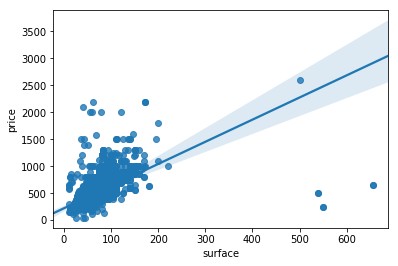

In [14]:
# Let's try the linear function again
linear_graph = sb.regplot(x="surface", y="price", data=df_apts_clean_part)

In [44]:
# Still some outliers on the surface (where do you even find a 600 m^2 apartment?)
# Let's check them out
df_apts.loc[df_apts.surface > 300]

,fingerprint,title,description,posted_date,price,currency,partitioning,surface,building_year,floor,number_of_rooms,terrace,parking,cellar,source_website,source_offer,neighborhood
1713,f798b8784a586cc7feb0cfdf10d2ae41e62984ae,For rent big apartment with 2 rooms and terrac...,Descriere anunt3-4 min walk to USAMV!Big apart...,2019-04-28 13:12:39.825909,650,EUR,decomandat,656.0,NaN,NaN,2.0,False,False,False,storia,Agentie imobiliara,not found
2186,28c3fa46d4a72dda63558cfcf4f66ac44f9bc949,"Apartament, 3 camere, 100 mp, parcare, zona st...",Descriere anuntOferta ID: 1230Va prezentam un ...,2019-04-28 13:23:36.516324,500,EUR,semidecomandat,540.0,2010,4.0,3.0,True,True,False,storia,Agentie imobiliara,buna ziua
2531,b2e62203c1ae765764ac0232f4100b337b552e8d,"Spatiu birouri, de închiriat, în Someseni",Descriere anuntILUSTRA IMOBILIARE inchiriază ...,2019-04-28 13:56:14.045835,2600,EUR,NaN,500.0,NaN,NaN,1.0,False,True,False,storia,Agentie imobiliara,someseni
4440,380c2abf651f11dc59bbf8b61d32e1cfdc00cd71,Inchiriez apartament frumos cu 2 camere+parcar...,Descriere anuntStudent Mob Cluj agentia imobil...,2019-04-28 14:17:28.367465,250,EUR,semidecomandat,550.0,NaN,NaN,2.0,False,False,False,storia,Agentie imobiliara,floresti
8299,fa7f670e7da3aae52e73bf8a94a0adde3a4c16d0,For rent big apartment with 2 rooms and terrac...,3-4 min walk to USAMV!Big apartment with 2 roo...,2019-04-23 07:06:00,650,EUR,Decomandat,656.0,NaN,NaN,NaN,False,False,False,olx,Agentie,usamv
9262,f4faf1040bea27fcb0cbe91cc316228d78888b9a,Inchiriez apartament frumos cu 2 camere+parcar...,Student Mob Cluj agentia imobiliara cu cel mai...,2019-04-24 10:37:00,250,EUR,Semidecomandat,550.0,NaN,NaN,NaN,False,False,False,olx,Agentie,floresti
9995,af37710b14e3cfceb13abef5b2b1d206a31671c5,"Apartament, 3 camere, 100 mp, parcare, zona st...",Oferta ID: 1230Va prezentam un apartament mode...,2019-04-25 15:22:00,500,EUR,Semidecomandat,540.0,Dupa 2000,4.0,NaN,True,True,False,olx,Agentie,buna ziua


In [40]:
# The only one making sense is 2531, but it's an office space so we can safely clean them all out
df_apts_clean = df_apts_clean_part.loc[df_apts_clean_part.surface < 300]

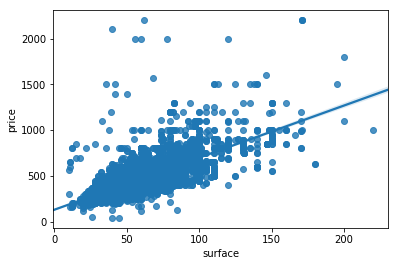

In [41]:
# Let's try the linear function AGAIN
linear_graph = sb.regplot(x="surface", y="price", data=df_apts_clean)

In [30]:
# That's better, now the linearity is observable

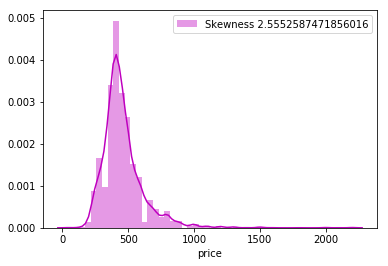

In [65]:
# Let's check out the price distribution
skew = df_apts_clean["price"].skew()
price_dist = sb.distplot(df_apts_clean["price"], color="m", label=f"Skewness {skew}")
price_dist = price_dist.legend(loc="best")

In [42]:
# Explanation: the skew means where the tail of the distribution is
# if it's negative, more values in the higher part, positive, then more values in the lower part
# conclusion: the skew is high, because we still have some extreme values wich might impact the skew

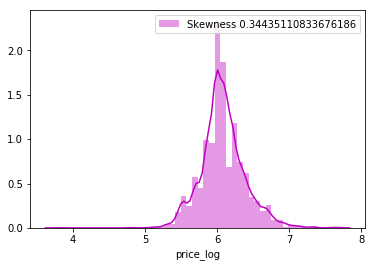

In [61]:
# We apply a normalization procedure (logarithm of price) to minimise the impact of extreme values
skew = df_apts_clean["price_log"].skew()
df_apts_clean.loc[:, 'price_log'] = df_apts_clean["price"].map(lambda i: np.log1p(i) if i > 0 else 0)
price_log_dist = sb.distplot(df_apts_clean["price_log"], color="m", label=f"Skewness {skew}")
price_log_dist = price_log_dist.legend(loc="best")

In [ ]:
# Way better skew, which show that the apartment prices are near symmetric respective to their size
# but still slightly cheaper than they are expensive